# Access drive contents

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data interpolation

In [ ]:
import pandas as pd
# Load the data from the CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/Konya_j_trimmed.csv'
try:
    data = pd.read_csv(file_path)

    # Interpolate the missing data (linear interpolation) and round to integers
    data_interpolated = data.interpolate(method='linear', axis=0)
    data_interpolated = data_interpolated.round(0).astype(int, errors='ignore')

    # Save the new interpolated data to a new CSV file
    new_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/Konya_j_interp.csv'
    data_interpolated.to_csv(new_file_path, index=False)

    new_file_path
except FileNotFoundError:
    "File not found. Please check the file path and try again."

<ipython-input-63-6edc1d9b21c2>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear', axis=0)


In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/konya_j_trimmed.csv'

try:
    data = pd.read_csv(file_path)

    # Ensure the column is numeric
    data['Death_and_injury_accidents'] = pd.to_numeric(data['Death_and_injury_accidents'], errors='coerce')

    # Handle columns with entirely missing values
    if data['Death_and_injury_accidents'].isna().all():
        data['Death_and_injury_accidents'] = data['Death_and_injury_accidents'].fillna(method='ffill').fillna(method='bfill')

    # Interpolate the missing data (linear interpolation) and round to integers
    data_interpolated = data.interpolate(method='linear', axis=0)
    data_interpolated = data_interpolated.round(0).astype(int, errors='ignore')

    # Save the new interpolated data to a new CSV file
    new_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/Konya_j_interp.csv'
    data_interpolated.to_csv(new_file_path, index=False)

    new_file_path
except FileNotFoundError:
    "File not found. Please check the file path and try again."


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/Izmir_j_interp.csv'
dataset = pd.read_csv(csv_path)

# Calculate the shape
rows, columns = dataset.shape

# Display the shape
print(f"Dataset shape: {rows} rows, {columns} columns")


Dataset shape: 48 rows, 6 columns


# calculate total accidents for each months

**Graphs**

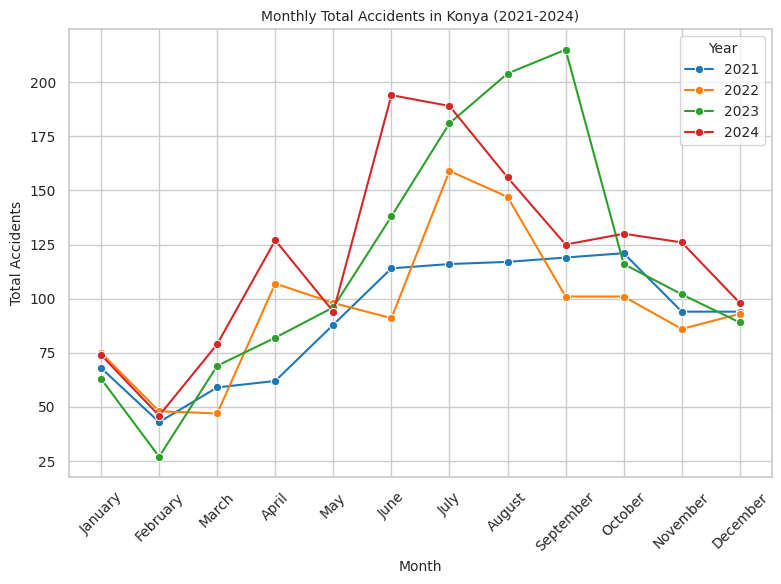

('/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv',
 '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/data_table/Konya_j_interp.csv'
data = pd.read_csv(file_path)

# Compute the total accidents column
#data['Total_Accidents'] = data['Death_and_injury_accidents'] + data['Property_damage_accidents']
# Compute the Total_Accidents column and insert it as the fifth column
data.insert(4, 'Total_Accidents', data['Death_and_injury_accidents'] + data['Property_damage_accidents'])

# Save the updated dataset
result_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data.to_csv(result_file_path, index=False)

# Ensure 'Month' is categorical and ordered correctly
data['Month'] = pd.Categorical(data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Plot Total Accidents for each month and year
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Use lineplot for graph style
sns.lineplot(data=data, x='Month', y='Total_Accidents', hue='Year', marker='o', palette='tab10')

# Customize the plot
plt.title('Monthly Total Accidents in Konya (2021-2024)', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Accidents', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Year', fontsize=10, title_fontsize=10)
plt.tight_layout()

# Save and display the plot
graph_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents.png'
plt.savefig(graph_file_path)
plt.show()

result_file_path, graph_file_path


<ipython-input-18-6f9572f0a69a>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total_accidents = data.groupby(['Year', 'Month'])['Total_Accidents'].sum().unstack()


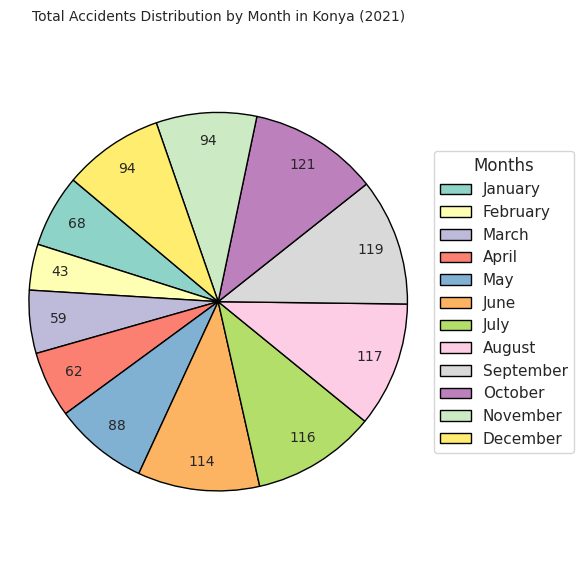

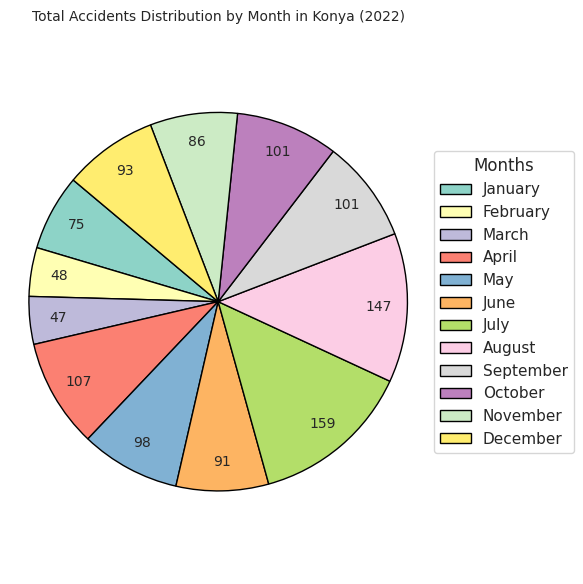

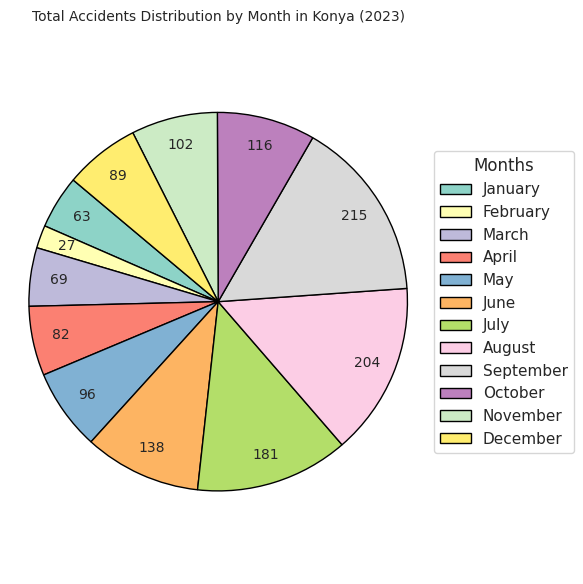

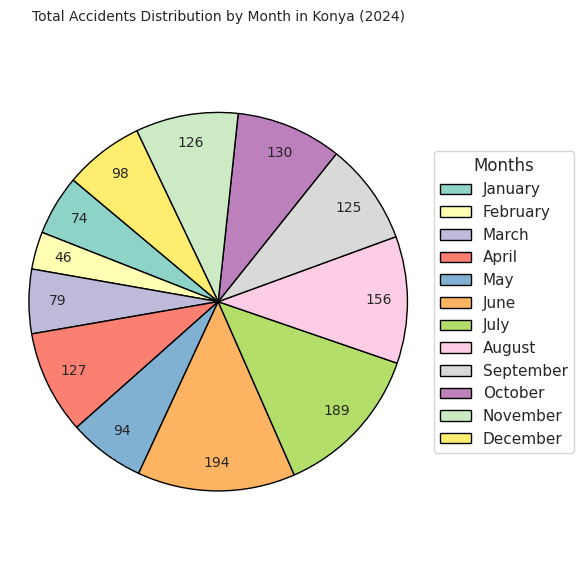

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_pie_chart_2024.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total accidents by Year and Month
monthly_total_accidents = data.groupby(['Year', 'Month'])['Total_Accidents'].sum().unstack()

# Create pie charts for each year
for year in monthly_total_accidents.index:
    plt.figure(figsize=(6, 6))
    month_data = monthly_total_accidents.loc[year]

    # Plot the pie chart for the given year with better label positioning
    wedges, texts, autotexts = plt.pie(
        month_data,
        autopct=lambda p: f'{p * month_data.sum() / 100:.0f}',
        startangle=140,
        colors=sns.color_palette("Set3", len(month_data)),
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85  # Moves the percentage text slightly inside the pie
    )

    # Adjust label positions to avoid overlap
    for text in texts:
        text.set(fontsize=10, ha='center', va='center')
    for autotext in autotexts:
        autotext.set(fontsize=10, ha='center', va='center')

    # Set title for the pie chart
    plt.title(f'Total Accidents Distribution by Month in Konya ({year})', fontsize=10)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Create legend with the corresponding month names
    plt.legend(wedges, month_data.index, title="Months", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Adjust layout to prevent overlapping of elements
    plt.tight_layout()

    # Save the pie chart for each year
    pie_chart_file_path = f'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_pie_chart_{year}.png'
    plt.savefig(pie_chart_file_path)
    plt.show()

pie_chart_file_path


<ipython-input-19-e53c6c57449b>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total_accidents = data.groupby('Month')['Total_Accidents'].sum()


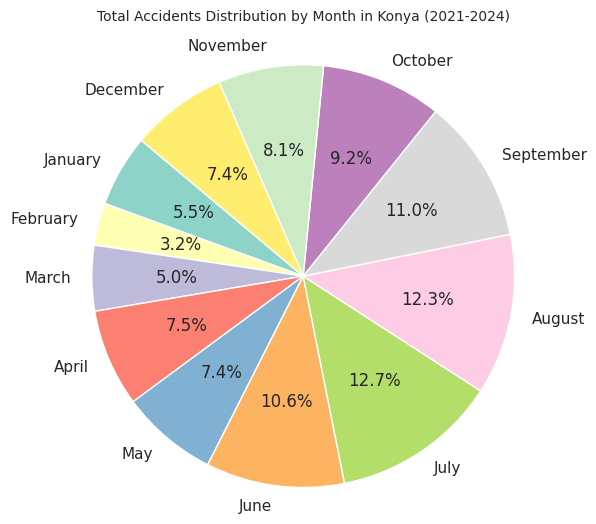

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_pie_chart.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total accidents by month
monthly_total_accidents = data.groupby('Month')['Total_Accidents'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    monthly_total_accidents,
    labels=monthly_total_accidents.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", len(monthly_total_accidents))
)
plt.title('Total Accidents Distribution by Month in Konya (2021-2024)\n', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart
pie_chart_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_pie_chart.png'
plt.savefig(pie_chart_file_path)
plt.show()

pie_chart_file_path


<ipython-input-20-e10f9e8a781c>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total_accidents = data.groupby(['Year', 'Month'])['Total_Accidents'].sum().unstack()


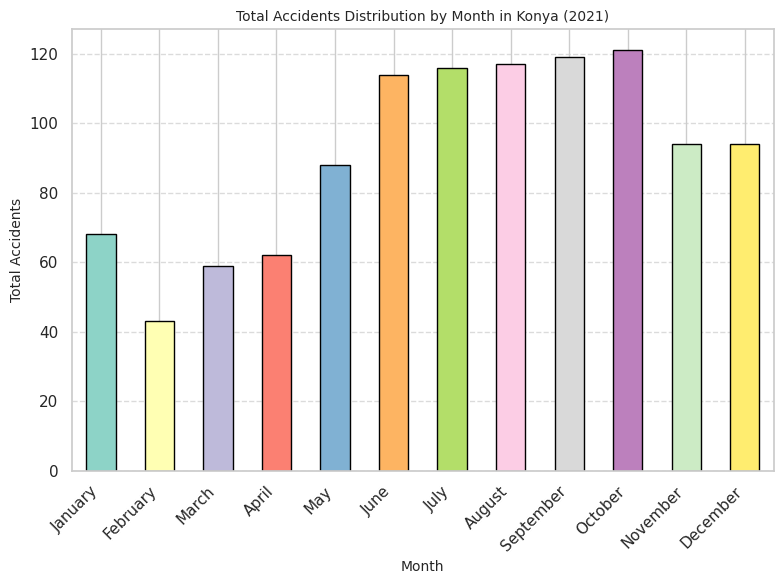

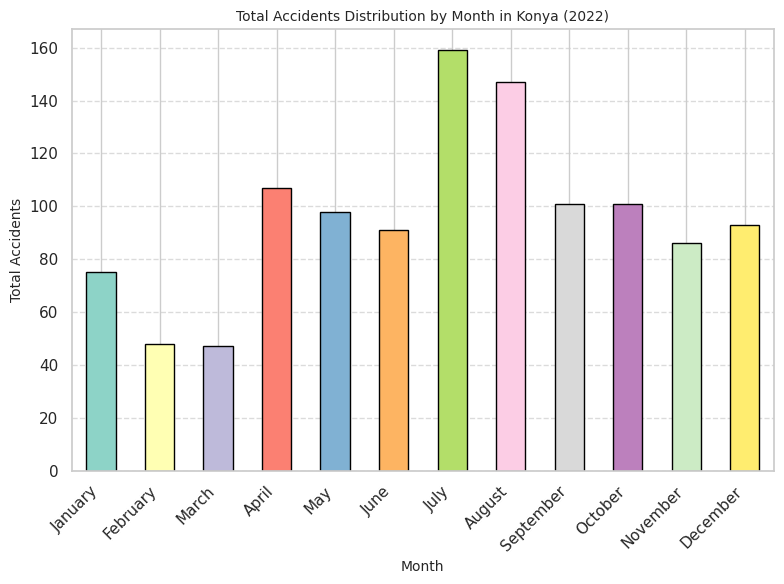

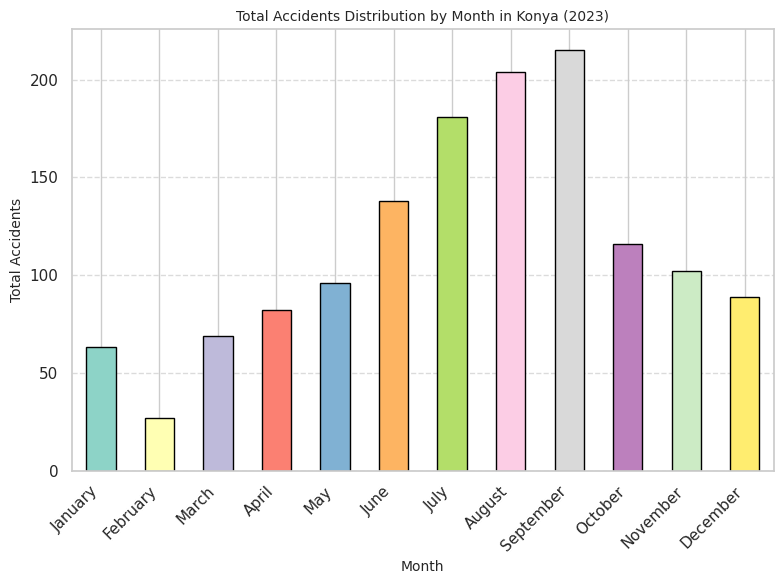

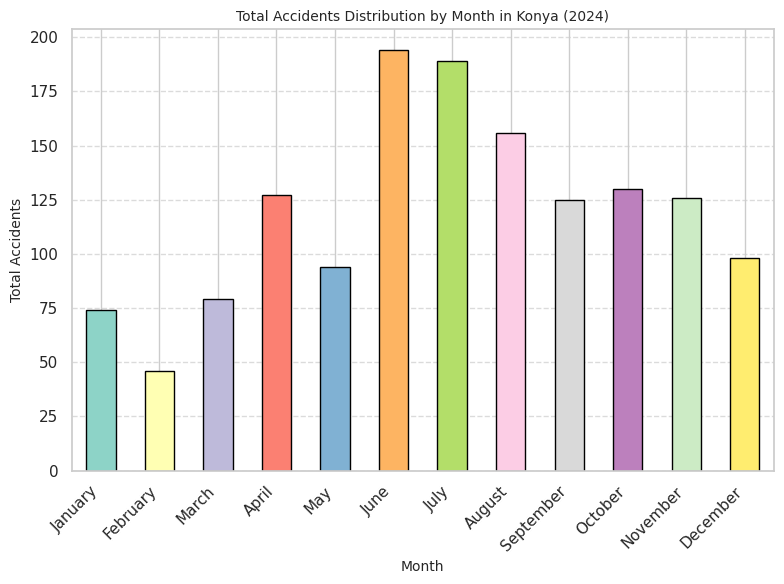

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_bar_chart_2024.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total accidents by Year and Month
monthly_total_accidents = data.groupby(['Year', 'Month'])['Total_Accidents'].sum().unstack()

# Create bar charts for each year
for year in monthly_total_accidents.index:
    plt.figure(figsize=(8, 6))
    month_data = monthly_total_accidents.loc[year]

    # Plot bar chart
    month_data.plot(kind='bar', color=sns.color_palette("Set3", len(month_data)), edgecolor='black')

    # Set title and labels
    plt.title(f'Total Accidents Distribution by Month in Konya ({year})', fontsize=10)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Total Accidents', fontsize=10)

    # Add gridlines for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Set x-axis tick labels to be rotated for better readability
    plt.xticks(rotation=45, ha='right')

    # Save the bar chart for each year
    bar_chart_file_path = f'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_total_accidents_bar_chart_{year}.png'
    plt.tight_layout()  # Ensure everything fits without overlap
    plt.savefig(bar_chart_file_path)
    plt.show()

bar_chart_file_path


# Death graphs

<ipython-input-22-df1eec298646>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deaths = data.groupby(['Year', 'Month'])['Death'].sum().unstack()


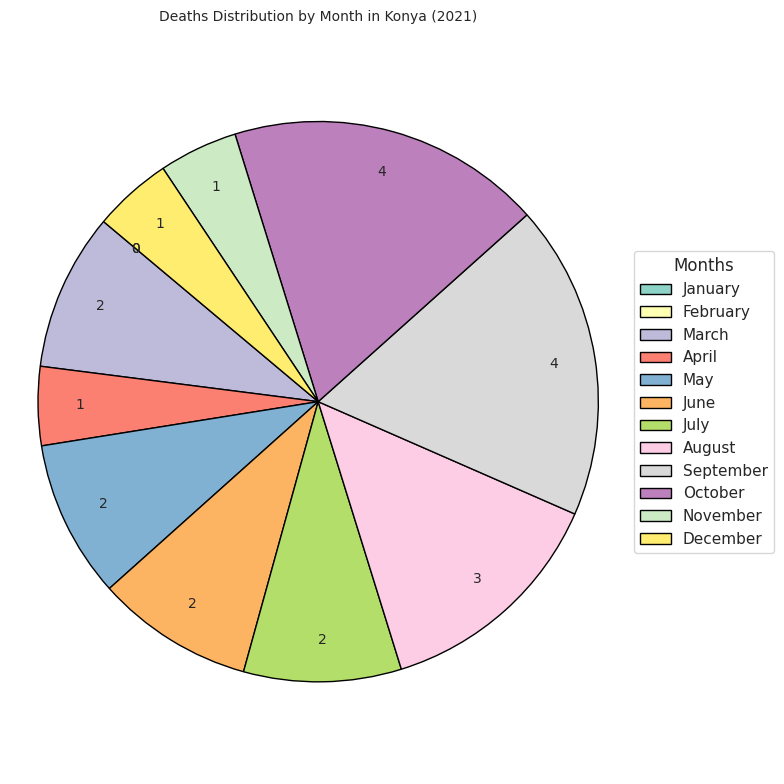

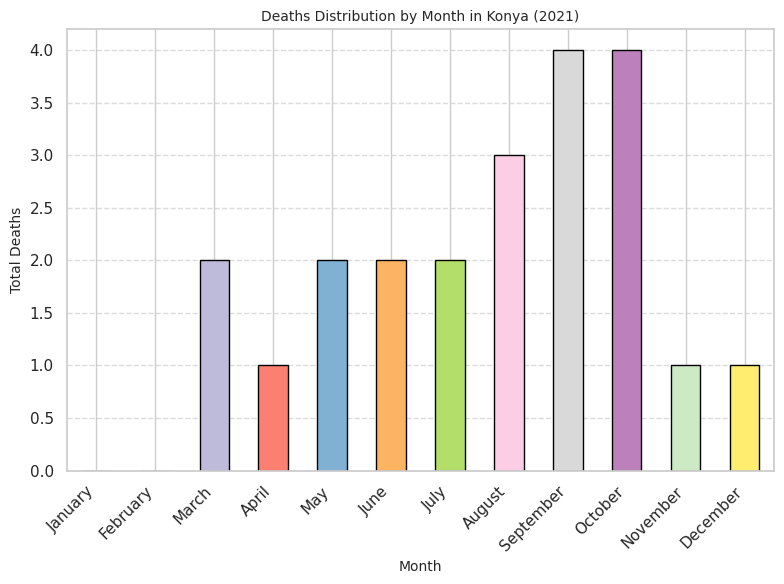

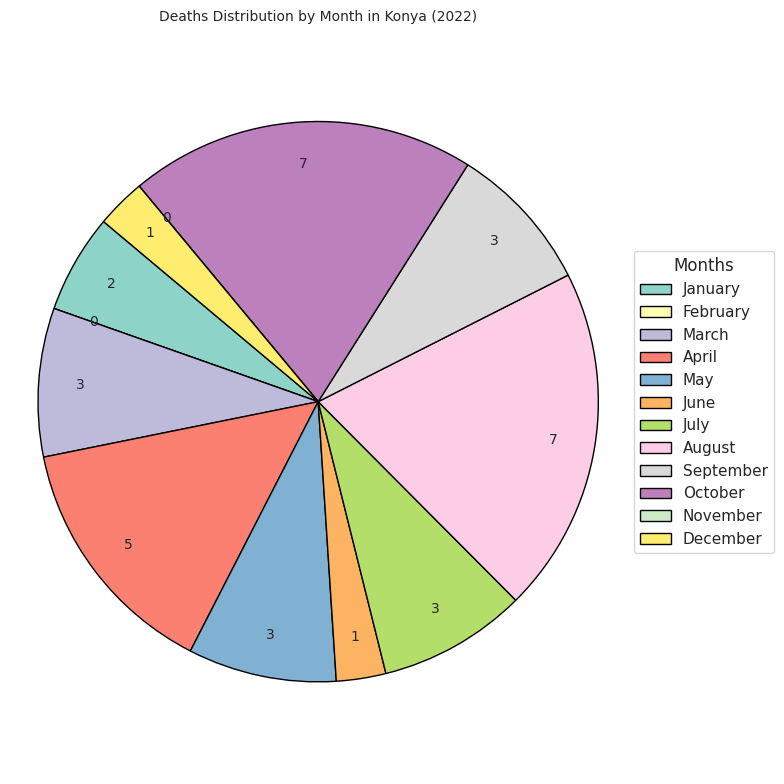

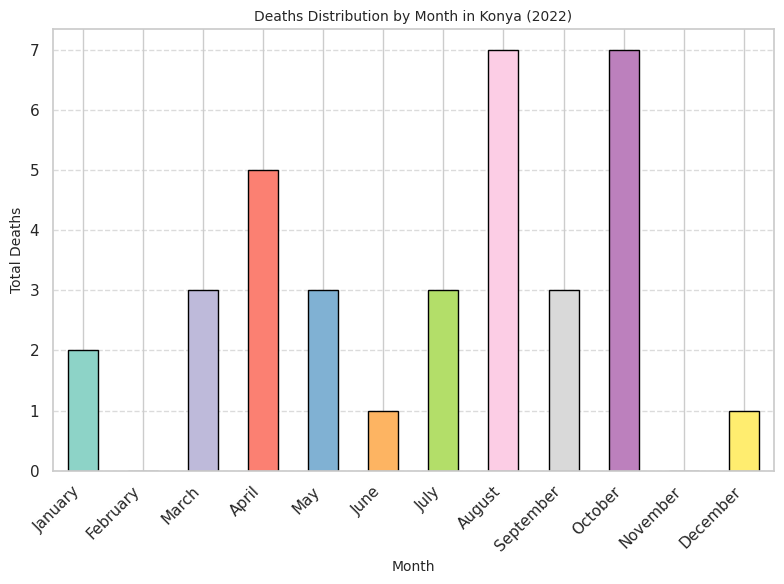

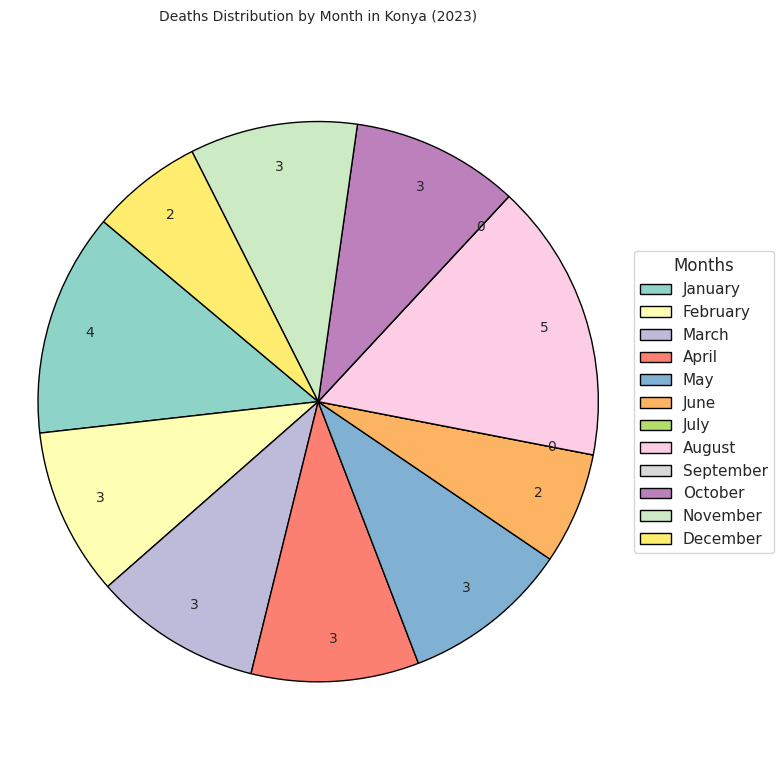

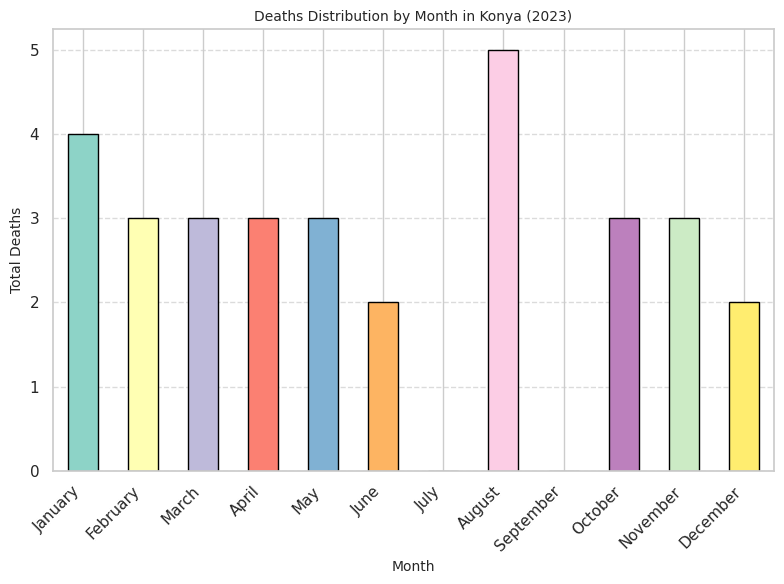

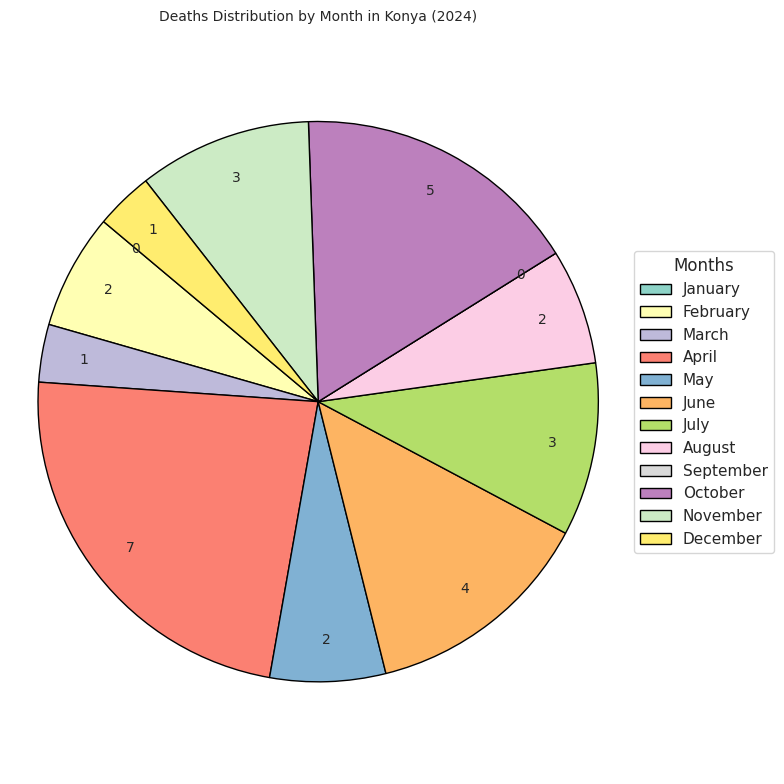

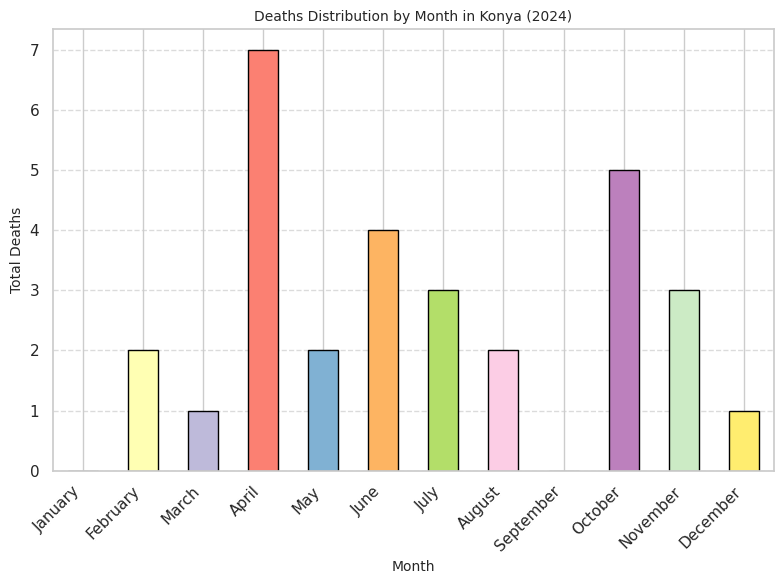

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total deaths by Year and Month
monthly_deaths = data.groupby(['Year', 'Month'])['Death'].sum().unstack()

# Create plots for each year
for year in monthly_deaths.index:
    # Pie chart for Death distribution by month
    plt.figure(figsize=(8, 8))
    death_data = monthly_deaths.loc[year]
    wedges, texts, autotexts = plt.pie(
        death_data,
        autopct=lambda p: f'{p * death_data.sum() / 100:.0f}',
        startangle=140,
        colors=sns.color_palette("Set3", len(death_data)),
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85  # Moves the percentage text slightly inside the pie
    )
    for text in texts:
        text.set(fontsize=10, ha='center', va='center')
    for autotext in autotexts:
        autotext.set(fontsize=10, ha='center', va='center')

    plt.title(f'Deaths Distribution by Month in Konya ({year})', fontsize=10)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(wedges, death_data.index, title="Months", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()
    pie_chart_file_path = f'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_deaths_pie_chart_{year}.png'
    plt.savefig(pie_chart_file_path)
    plt.show()

    # Bar chart for Death distribution by month
    plt.figure(figsize=(8, 6))
    death_data.plot(kind='bar', color=sns.color_palette("Set3", len(death_data)), edgecolor='black')
    plt.title(f'Deaths Distribution by Month in Konya ({year})', fontsize=10)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Total Deaths', fontsize=10)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    bar_chart_file_path = f'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_deaths_bar_chart_{year}.png'
    plt.tight_layout()
    plt.savefig(bar_chart_file_path)
    plt.show()


<ipython-input-23-05594801d132>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deaths = data.groupby(['Year', 'Month'])['Death'].sum().unstack()


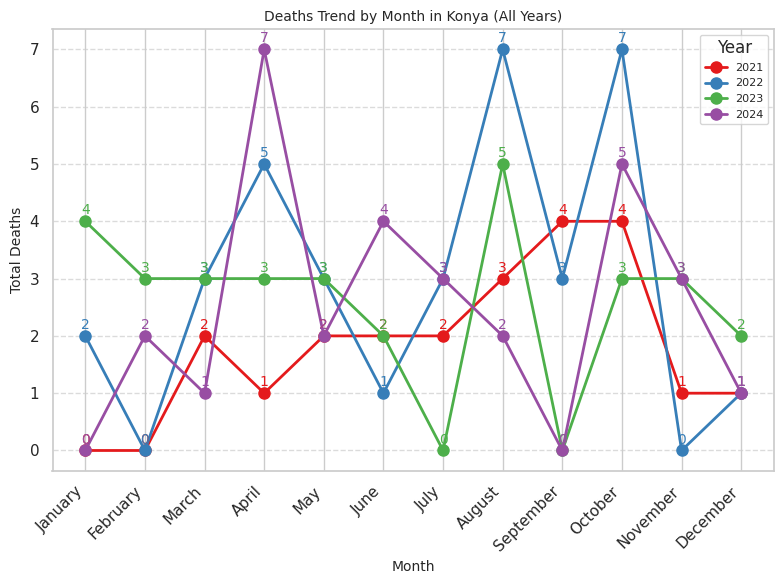

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_deaths_combined_line_plot_with_values.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total deaths by Year and Month
monthly_deaths = data.groupby(['Year', 'Month'])['Death'].sum().unstack()

# Define a color palette for the years
color_palette = sns.color_palette("Set1", len(monthly_deaths.index))

# Create a combined line plot for all years
plt.figure(figsize=(8, 6))

# Plot each year's data
for i, year in enumerate(monthly_deaths.index):
    # Plot the line
    plt.plot(monthly_deaths.columns, monthly_deaths.loc[year], marker='o', label=str(year),
             color=color_palette[i], linestyle='-', linewidth=2, markersize=8)

    # Annotate the values on each point of the line (month-wise)
    for j, month in enumerate(monthly_deaths.columns):
        plt.annotate(
            f'{monthly_deaths.loc[year][month]:.0f}',  # Death value (formatted as integer)
            (month, monthly_deaths.loc[year][month]),  # Position of the annotation
            textcoords="offset points",  # Move the text slightly off the point
            xytext=(0, 5),  # Offset by 5 points in y-direction
            ha='center',  # Horizontal alignment
            fontsize=10,  # Font size for the text
            color=color_palette[i]  # Set the text color to match the line
        )

# Set title and labels
plt.title('Deaths Trend by Month in Konya (All Years)', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Deaths', fontsize=10)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotate x-ticks for readability
plt.xticks(rotation=45, ha='right')

# Add legend to differentiate the years
plt.legend(title="Year", loc="upper right", fontsize=8)

# Save and show the plot
line_plot_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_deaths_combined_line_plot_with_values.png'
plt.tight_layout()
plt.savefig(line_plot_file_path)
plt.show()

line_plot_file_path


# injury Graph

<ipython-input-24-08bc9b64a054>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_injured = data.groupby(['Year', 'Month'])['Injured'].sum().unstack()


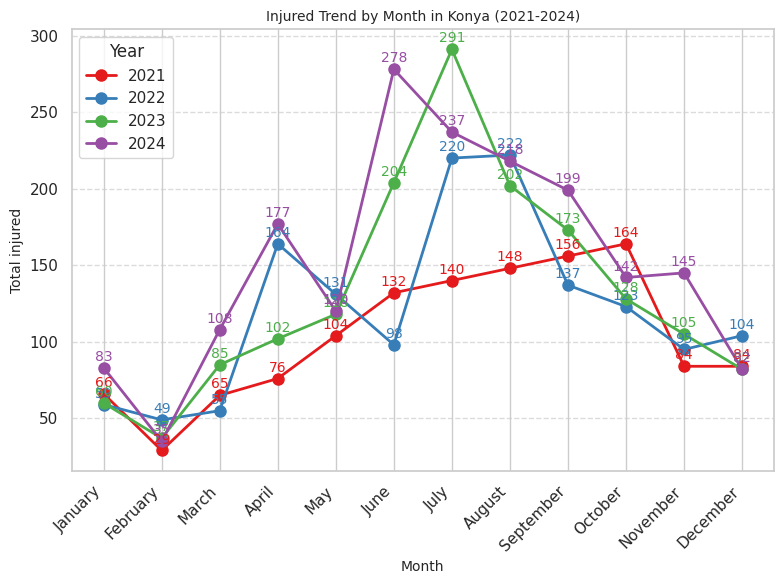

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_injured_combined_line_plot_with_values.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total deaths by Year and Month
monthly_injured = data.groupby(['Year', 'Month'])['Injured'].sum().unstack()

# Define a color palette for the years
color_palette = sns.color_palette("Set1", len(monthly_injured.index))

# Create a combined line plot for all years
plt.figure(figsize=(8, 6))

# Plot each year's data
for i, year in enumerate(monthly_injured.index):
    # Plot the line
    plt.plot(monthly_injured.columns, monthly_injured.loc[year], marker='o', label=str(year),
             color=color_palette[i], linestyle='-', linewidth=2, markersize=8)

    # Annotate the values on each point of the line (month-wise)
    for j, month in enumerate(monthly_injured.columns):
        plt.annotate(
            f'{monthly_injured.loc[year][month]:.0f}',  # Death value (formatted as integer)
            (month, monthly_injured.loc[year][month]),  # Position of the annotation
            textcoords="offset points",  # Move the text slightly off the point
            xytext=(0, 5),  # Offset by 5 points in y-direction
            ha='center',  # Horizontal alignment
            fontsize=10,  # Font size for the text
            color=color_palette[i]  # Set the text color to match the line
        )

# Set title and labels
plt.title('Injured Trend by Month in Konya (2021-2024)', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total injured', fontsize=10)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotate x-ticks for readability
plt.xticks(rotation=45, ha='right')

# Add legend to differentiate the years
plt.legend(title="Year", loc="upper left")

# Save and show the plot
line_plot_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_injured_combined_line_plot_with_values.png'
plt.tight_layout()
plt.savefig(line_plot_file_path)
plt.show()

line_plot_file_path


<ipython-input-25-1f54aa02c27e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_injured = data.groupby(['Year', 'Month'])['Injured'].sum().unstack()


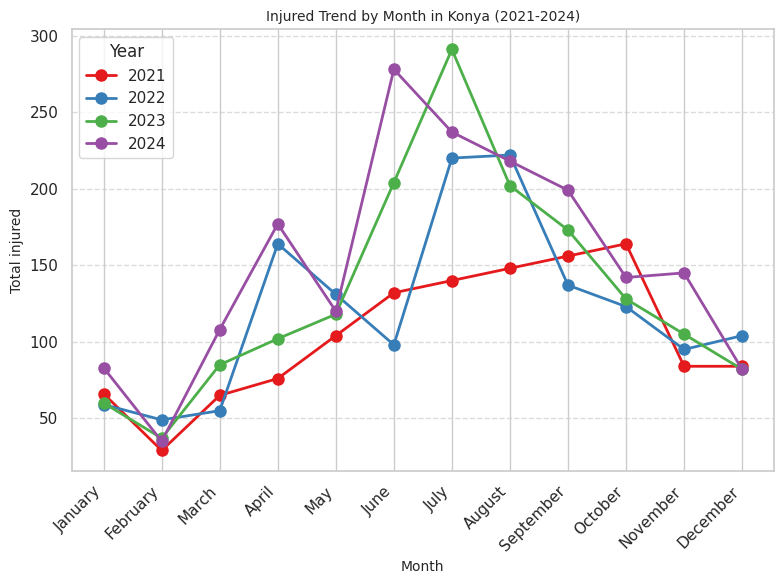

'/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_injured_combined_line_plot_no_values.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure that the 'Month' column is treated as a categorical variable with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Aggregate total deaths by Year and Month
monthly_injured = data.groupby(['Year', 'Month'])['Injured'].sum().unstack()

# Define a color palette for the years
color_palette = sns.color_palette("Set1", len(monthly_injured.index))

# Create a combined line plot for all years
plt.figure(figsize=(8, 6))

# Plot each year's data
for i, year in enumerate(monthly_injured.index):
    # Plot the line
    plt.plot(monthly_injured.columns, monthly_injured.loc[year], marker='o', label=str(year),
             color=color_palette[i], linestyle='-', linewidth=2, markersize=8)

# Set title and labels
plt.title('Injured Trend by Month in Konya (2021-2024)', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total injured', fontsize=10)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotate x-ticks for readability
plt.xticks(rotation=45, ha='right')

# Add legend to differentiate the years
plt.legend(title="Year", loc="upper left")

# Save and show the plot
line_plot_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/Graphs/Konya/Konya_injured_combined_line_plot_no_values.png'
plt.tight_layout()
plt.savefig(line_plot_file_path)
plt.show()

line_plot_file_path


# Total Calculations by year

<ipython-input-26-037794f359b1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_accidents.index, y=yearly_accidents.values, palette='viridis')


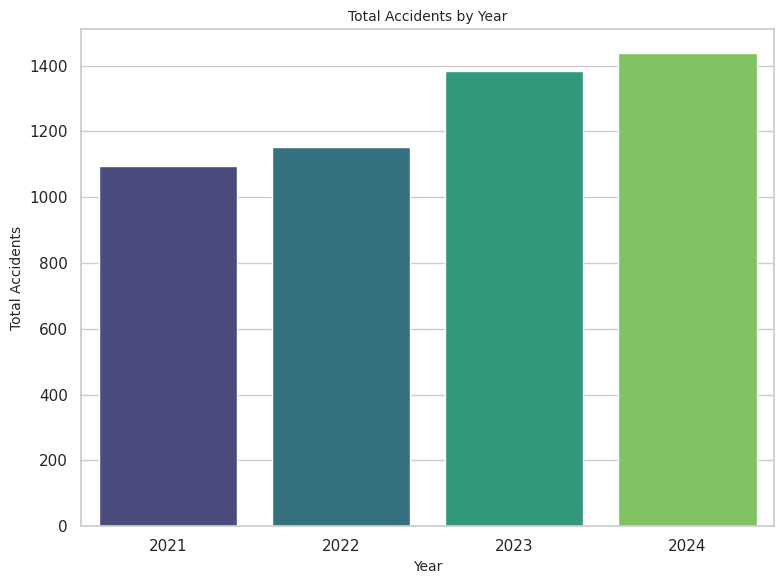

<ipython-input-26-037794f359b1>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, palette='coolwarm')


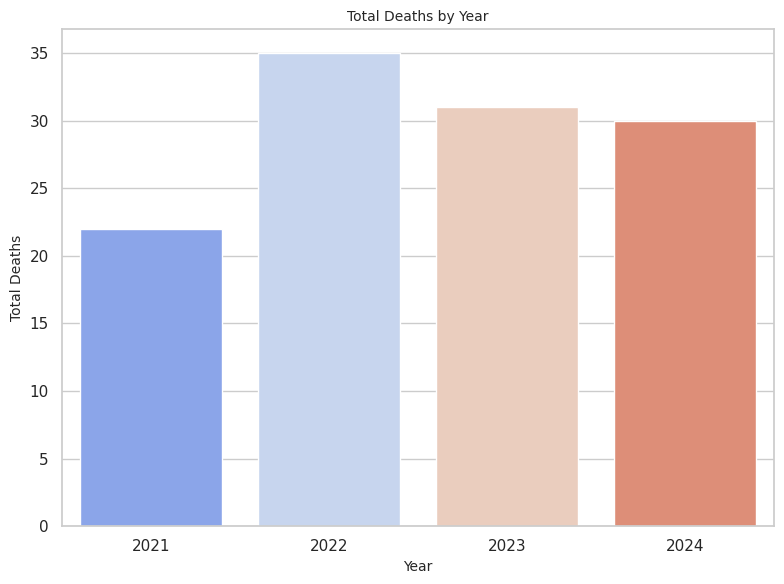

<ipython-input-26-037794f359b1>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_injuries.index, y=yearly_injuries.values, palette='magma')


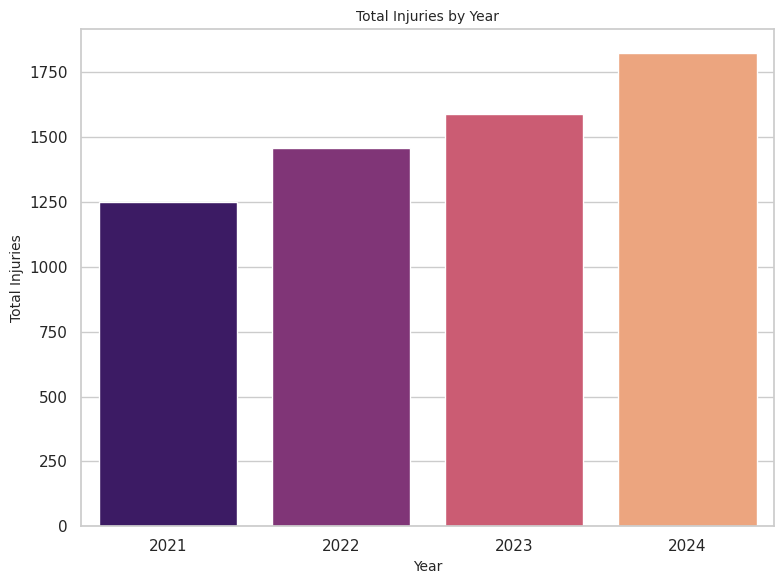

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv'
data = pd.read_csv(file_path)

# Calculate the total accidents for each month (Death_and_injury_accidents + Property_damage_accidents)
data['Total_Accidents'] = data['Death_and_injury_accidents'] + data['Property_damage_accidents']

# Create an empty list to store the new rows (total values for each year)
new_rows = []

# Process each year individually and append the total row after December for each year
for year in data['Year'].unique():
    yearly_data = data[data['Year'] == year]

    # Calculate the total values for the year
    total_accidents = yearly_data['Total_Accidents'].sum()
    total_deaths = yearly_data['Death'].sum()
    total_injuries = yearly_data['Injured'].sum()

    # Create a new row for the total values (Year will be repeated for the new row)
    new_row = {
        'Year': year,
        'Month': 'Total',  # Indicate this is the total row for the year
        'Death_and_injury_accidents': total_accidents - yearly_data['Property_damage_accidents'].sum(),
        'Property_damage_accidents': total_accidents - yearly_data['Death_and_injury_accidents'].sum(),
        'Death': total_deaths,
        'Injured': total_injuries,
        'Total_Accidents': total_accidents
    }
    # Find the index after December of the respective year
    last_index = yearly_data.index[-1]

    # Insert the new row right after December
    data = pd.concat([data.iloc[:last_index+1], pd.DataFrame([new_row]), data.iloc[last_index+1:]], ignore_index=True)

# Save the new data with totals as a new CSV file
new_data_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_results_totals.csv'
data.to_csv(new_data_file_path, index=False)

# Display the modified table with totals
data

# Plot the total accidents, deaths, and injuries by year

# Plot Total Accidents by Year
plt.figure(figsize=(8, 6))
yearly_accidents = data[data['Month'] == 'Total'].groupby('Year')['Total_Accidents'].sum()
sns.barplot(x=yearly_accidents.index, y=yearly_accidents.values, palette='viridis')
plt.title('Total Accidents by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Accidents', fontsize=10)
plt.tight_layout()
plt.show()

# Plot Total Deaths by Year
plt.figure(figsize=(8, 6))
yearly_deaths = data[data['Month'] == 'Total'].groupby('Year')['Death'].sum()
sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, palette='coolwarm')
plt.title('Total Deaths by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Deaths', fontsize=10)
plt.tight_layout()
plt.show()

# Plot Total Injuries by Year
plt.figure(figsize=(8, 6))
yearly_injuries = data[data['Month'] == 'Total'].groupby('Year')['Injured'].sum()
sns.barplot(x=yearly_injuries.index, y=yearly_injuries.values, palette='magma')
plt.title('Total Injuries by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Injuries', fontsize=10)
plt.tight_layout()
plt.show()


# Prediction model using AI method

# **data preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_total_acc.csv'
data = pd.read_csv(file_path)

# Step 2: Handle missing values
data = data.interpolate(method='linear', axis=0)

# Step 3: Feature engineering
# Convert 'Month' to categorical with correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Encode 'Month' to numerical
data['Month_num'] = data['Month'].cat.codes

# Step 4: Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ['Total_Accidents', 'Death', 'Injured']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 5: Encode categorical features
data = pd.get_dummies(data, columns=['Year'], prefix='Year')

# Step 6: Split data into features and targets
X = data.drop(columns=['Death', 'Injured', 'Total_Accidents'])
y_accidents = data['Total_Accidents']
y_deaths = data['Death']
y_injuries = data['Injured']

# Split data into training and testing sets
X_train, X_test, y_train_accidents, y_test_accidents = train_test_split(X, y_accidents, test_size=0.2, random_state=42)
_, _, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)
_, _, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)

# Step 7: Train and evaluate models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, target_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{target_name} Model:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R²: {r2}\n')

# Accidents model
train_and_evaluate_model(X_train, X_test, y_train_accidents, y_test_accidents, 'Accidents')

# Deaths model
train_and_evaluate_model(X_train, X_test, y_train_deaths, y_test_deaths, 'Deaths')

# Injuries model
train_and_evaluate_model(X_train, X_test, y_train_injuries, y_test_injuries, 'Injuries')

# Step 8: Save the processed dataset
processed_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_pro1.csv'
data.to_csv(processed_file_path, index=False)


<ipython-input-47-d4336a6a8c1c>:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear', axis=0)


ValueError: Cannot cast object dtype to float64

In [ ]:
import pandas as pd

# File path for the original dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_total_acc.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Drop the 'Month' and 'Year' columns
data = data.drop(columns=['Month', 'Year'])

# Save the updated dataset back to the same file or a new file
output_file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_total_acc_pro.csv'
data.to_csv(output_file_path, index=False)

print(f"Columns 'Month' and 'Year' have been removed. Updated dataset saved to: {output_file_path}")


Columns 'Month' and 'Year' have been removed. Updated dataset saved to: /content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_total_acc_pro.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_total_acc.csv"
dataset = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(dataset.head())

# Step 1: Handle missing values
# Check for missing values
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())

# Fill missing values with column mean
dataset.fillna(dataset.mean(), inplace=True)

# Step 2: Remove target or irrelevant columns (if any)
if 'month' in dataset.columns:  # Replace 'Type' with the actual target column name if needed
    dataset = dataset.drop(columns=['month'])

# Step 3: Remove outliers
# Calculate z-scores for all features
z_scores = np.abs(zscore(dataset))

# Remove rows with z-scores greater than 3 (adjust threshold as needed)
dataset = dataset[(z_scores < 3).all(axis=1)]

# Step 4: Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(dataset)

# Convert back to DataFrame for readability
processed_data = pd.DataFrame(data_normalized, columns=dataset.columns)

# Save the preprocessed data to a CSV file
output_path = "/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Ankara_j_pro2.csv"
processed_data.to_csv(output_path, index=False)
print(f"\nPreprocessed dataset saved to: {output_path}")

# Display summary statistics of the preprocessed data
print("\nSummary Statistics of Preprocessed Data:")
print(processed_data.describe())


Original Dataset:
   Year     Month  Death_and_injury_accidents  Property_damage_accidents  \
0  2024   January                          68                        101   
1  2024  February                          64                         96   
2  2024     March                          83                        110   
3  2024     April                         107                        102   
4  2024       May                          71                        117   

   Total_Accidents  Death  Injured  
0              169      0      105  
1              160      3      116  
2              193      4      176  
3              209      2      196  
4              188      2      110  

Missing Values in Each Column:
Year                          0
Month                         0
Death_and_injury_accidents    0
Property_damage_accidents     0
Total_Accidents               0
Death                         0
Injured                       0
dtype: int64


TypeError: Could not convert ['JanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecemberJanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecemberJanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecemberJanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecember'] to numeric

**RandomForestRegressor model**

Accidents Model:
MAE: 3.3530000000000015, MSE: 36.65263000000004, R²: 0.9823704065337848

Deaths Model:
MAE: 0.07799999999999992, MSE: 0.02241999999999996, R²: 0.9921056338028169

Injuries Model:
MAE: 6.694000000000003, MSE: 61.53950000000001, R²: 0.9795943033357649

Predictions for a specific test set (Accidents):
[106.67  89.41  47.46 117.58  68.6   48.95  63.81 187.07  94.43  47.77]

Predictions for a specific test set (Deaths):
[4.61 2.   3.   2.99 1.99 0.03 4.05 4.74 2.   0.03]

Predictions for a specific test set (Injuries):
[155.57 105.93  52.45 142.64  67.83  44.99  65.84 212.42 124.14  45.55]


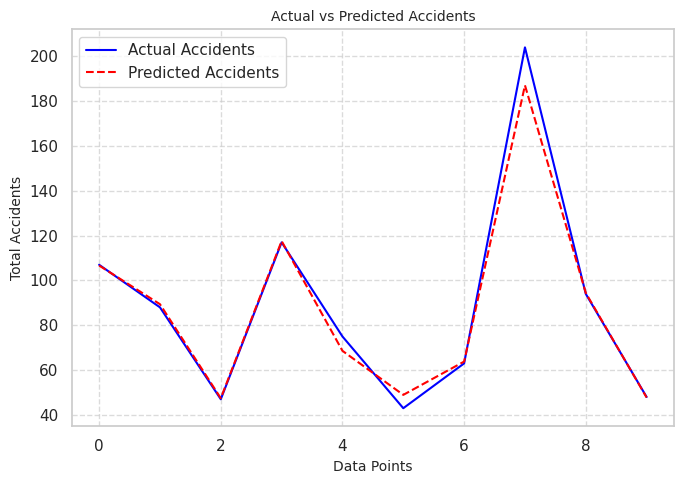

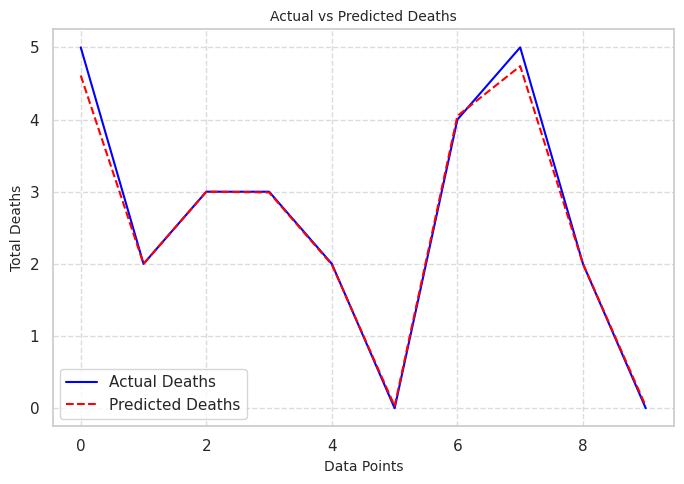

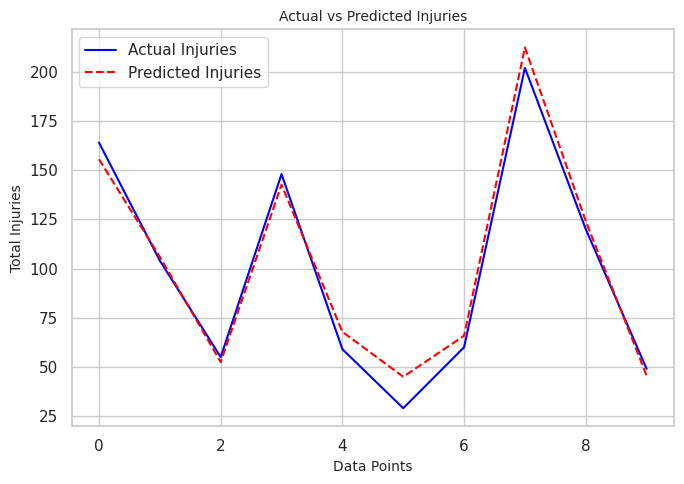

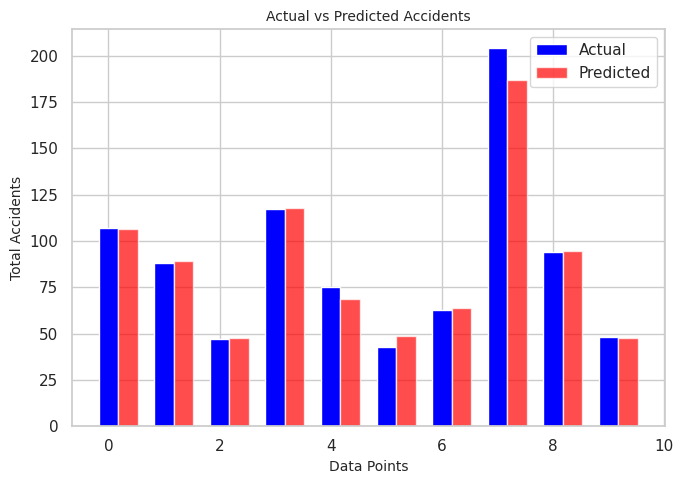

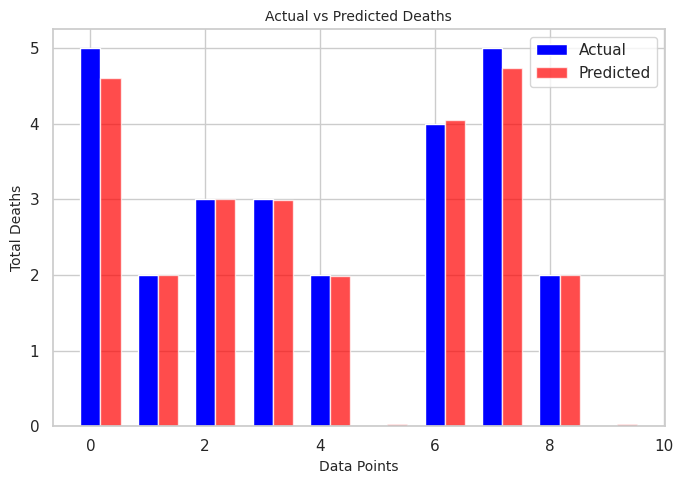

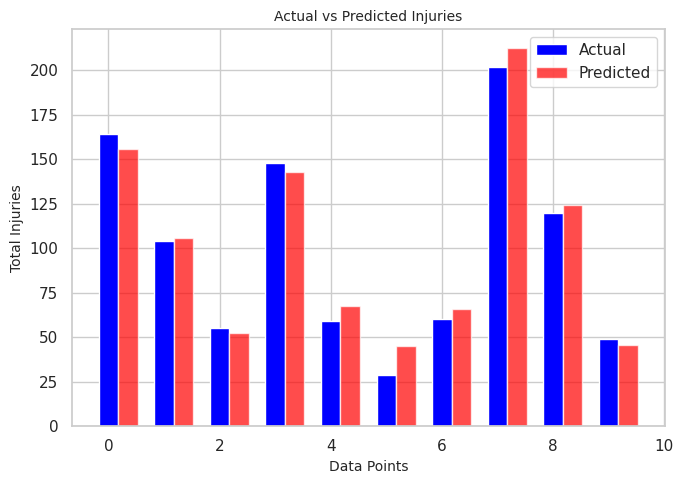

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv')

# Prepare the features (X) and target variables (y)
X = data[['Death_and_injury_accidents', 'Property_damage_accidents', 'Death', 'Injured']]  # Features

# Separate target variables for accidents, deaths, and injuries
y_accidents = data['Total_Accidents']
y_deaths = data['Death']
y_injuries = data['Injured']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train_accidents, y_test_accidents = train_test_split(X, y_accidents, test_size=0.2, random_state=42)
_, _, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)
_, _, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor models for each target variable
model_accidents = RandomForestRegressor(n_estimators=100, random_state=42)
model_deaths = RandomForestRegressor(n_estimators=100, random_state=42)
model_injuries = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
model_accidents.fit(X_train, y_train_accidents)
model_deaths.fit(X_train, y_train_deaths)
model_injuries.fit(X_train, y_train_injuries)

# Make predictions for each model on the test set
y_pred_accidents = model_accidents.predict(X_test)
y_pred_deaths = model_deaths.predict(X_test)
y_pred_injuries = model_injuries.predict(X_test)

# Evaluate the models' performance
mae_accidents = mean_absolute_error(y_test_accidents, y_pred_accidents)
mse_accidents = mean_squared_error(y_test_accidents, y_pred_accidents)
r2_accidents = r2_score(y_test_accidents, y_pred_accidents)

mae_deaths = mean_absolute_error(y_test_deaths, y_pred_deaths)
mse_deaths = mean_squared_error(y_test_deaths, y_pred_deaths)
r2_deaths = r2_score(y_test_deaths, y_pred_deaths)

mae_injuries = mean_absolute_error(y_test_injuries, y_pred_injuries)
mse_injuries = mean_squared_error(y_test_injuries, y_pred_injuries)
r2_injuries = r2_score(y_test_injuries, y_pred_injuries)

# Print the evaluation metrics for each model
print("Accidents Model:")
print(f'MAE: {mae_accidents}, MSE: {mse_accidents}, R²: {r2_accidents}')

print("\nDeaths Model:")
print(f'MAE: {mae_deaths}, MSE: {mse_deaths}, R²: {r2_deaths}')

print("\nInjuries Model:")
print(f'MAE: {mae_injuries}, MSE: {mse_injuries}, R²: {r2_injuries}')

# Predictions for a specific test set (Optional)
print("\nPredictions for a specific test set (Accidents):")
print(y_pred_accidents[:10])  # Show first 10 predictions for accidents

print("\nPredictions for a specific test set (Deaths):")
print(y_pred_deaths[:10])  # Show first 10 predictions for deaths

print("\nPredictions for a specific test set (Injuries):")
print(y_pred_injuries[:10])  # Show first 10 predictions for injuries

import numpy as np
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values for each model using line charts

# Line chart for Total Accidents
plt.figure(figsize=(7, 5))
plt.plot(y_test_accidents.values, label='Actual Accidents', color='blue')
plt.plot(y_pred_accidents, label='Predicted Accidents', color='red', linestyle='--')
plt.title('Actual vs Predicted Accidents', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Accidents', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line chart for Total Deaths
plt.figure(figsize=(7, 5))
plt.plot(y_test_deaths.values, label='Actual Deaths', color='blue')
plt.plot(y_pred_deaths, label='Predicted Deaths', color='red', linestyle='--')
plt.title('Actual vs Predicted Deaths', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Deaths', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line chart for Total Injuries
plt.figure(figsize=(7, 5))
plt.plot(y_test_injuries.values, label='Actual Injuries', color='blue')
plt.plot(y_pred_injuries, label='Predicted Injuries', color='red', linestyle='--')
plt.title('Actual vs Predicted Injuries', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Injuries', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

# Function for plotting bar charts
def plot_bar_chart(actual, predicted, title, ylabel):
    indices = np.arange(len(actual))
    bar_width = 0.35
    plt.figure(figsize=(7, 5))
    plt.bar(indices, actual, bar_width, label='Actual', color='blue')
    plt.bar(indices + bar_width, predicted, bar_width, label='Predicted', color='red', alpha=0.7)
    plt.title(title, fontsize=10)
    plt.xlabel('Data Points', fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.legend()
    #plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Bar chart for Total Accidents
plot_bar_chart(y_test_accidents.values, y_pred_accidents, 'Actual vs Predicted Accidents', 'Total Accidents')

# Bar chart for Total Deaths
plot_bar_chart(y_test_deaths.values, y_pred_deaths, 'Actual vs Predicted Deaths', 'Total Deaths')

# Bar chart for Total Injuries
plot_bar_chart(y_test_injuries.values, y_pred_injuries, 'Actual vs Predicted Injuries', 'Total Injuries')



In [ ]:

# Plotting the evaluation results for each model
'''
# Bar chart for Accidents
plt.figure(figsize=(8, 6))
plt.bar(['MAE', 'MSE', 'R²'], [mae_accidents, mse_accidents, r2_accidents], color='skyblue')
plt.title("Accidents Model Evaluation")
plt.ylabel("Score")
plt.show()

# Bar chart for Deaths
plt.figure(figsize=(8, 6))
plt.bar(['MAE', 'MSE', 'R²'], [mae_deaths, mse_deaths, r2_deaths], color='salmon')
plt.title("Deaths Model Evaluation")
plt.ylabel("Score")
plt.show()

# Bar chart for Injuries
plt.figure(figsize=(8, 6))
plt.bar(['MAE', 'MSE', 'R²'], [mae_injuries, mse_injuries, r2_injuries], color='lightgreen')
plt.title("Injuries Model Evaluation")
plt.ylabel("Score")
plt.show()
'''

**Linear regression**

Accidents Model:
MAE: 5.3290705182007514e-14, MSE: 3.821873313614758e-27, R²: 1.0

Deaths Model:
MAE: 5.9016770997084565e-15, MSE: 4.791104687382019e-29, R²: 1.0

Injuries Model:
MAE: 5.826450433232821e-14, MSE: 4.553936233659857e-27, R²: 1.0

Predictions for a specific test set (Accidents):
[107.  88.  47. 117.  75.  43.  63. 204.  94.  48.]

Predictions for a specific test set (Deaths):
[ 5.00000000e+00  2.00000000e+00  3.00000000e+00  3.00000000e+00
  2.00000000e+00 -7.77335400e-15  4.00000000e+00  5.00000000e+00
  2.00000000e+00 -1.26076557e-14]

Predictions for a specific test set (Injuries):
[164. 104.  55. 148.  59.  29.  60. 202. 120.  49.]


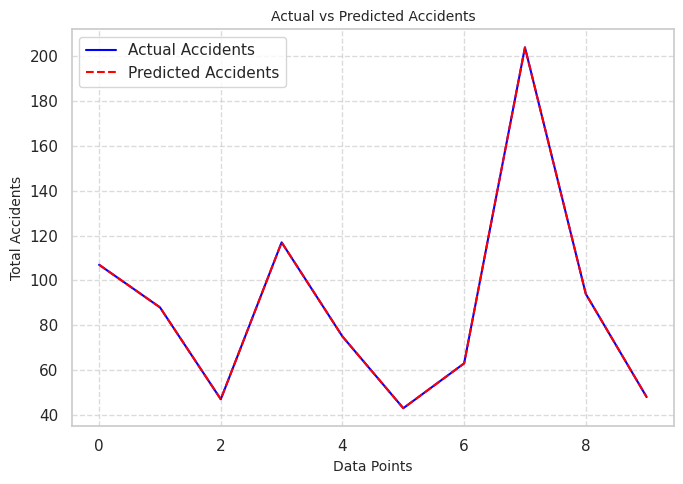

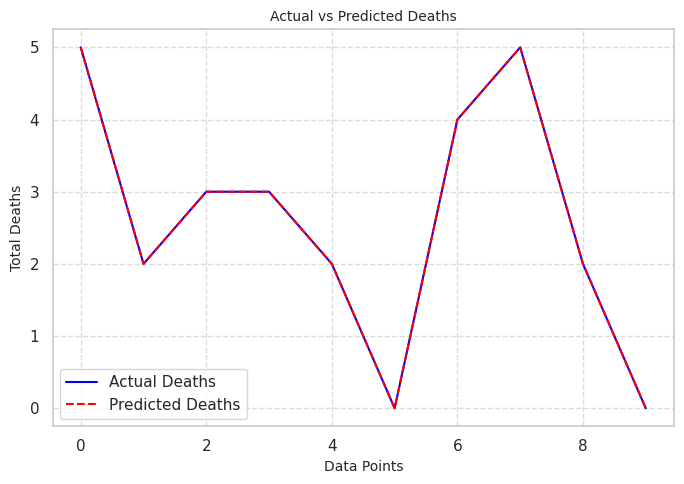

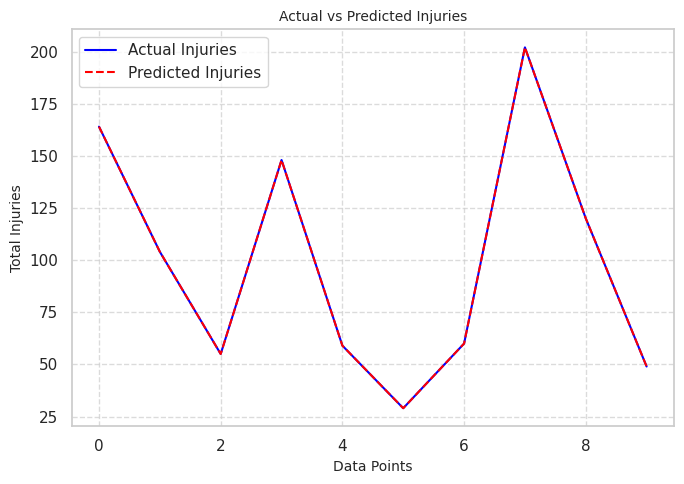

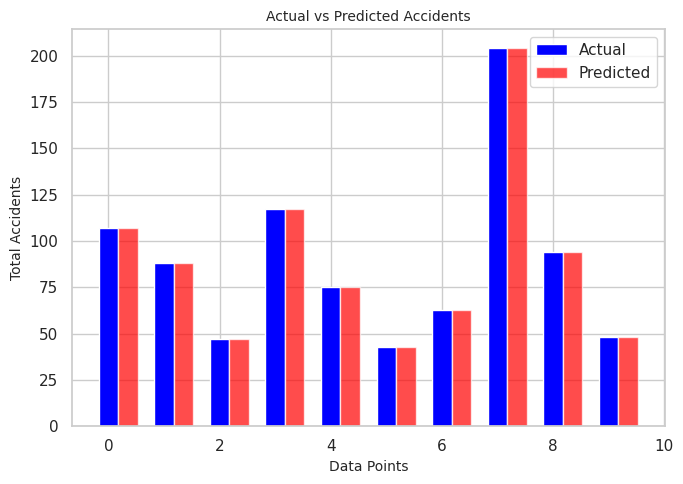

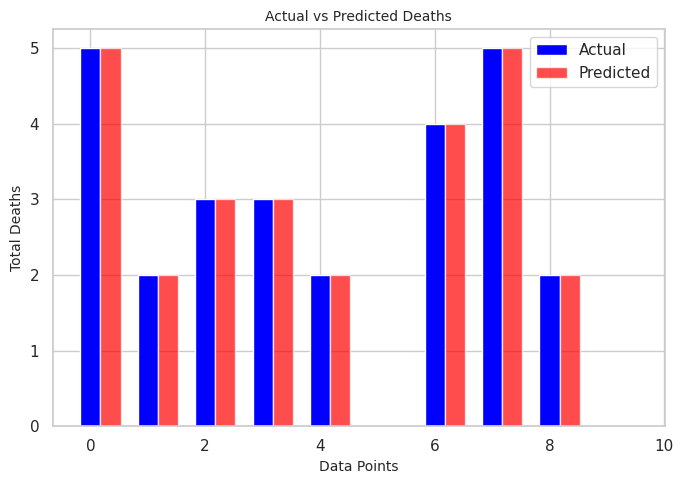

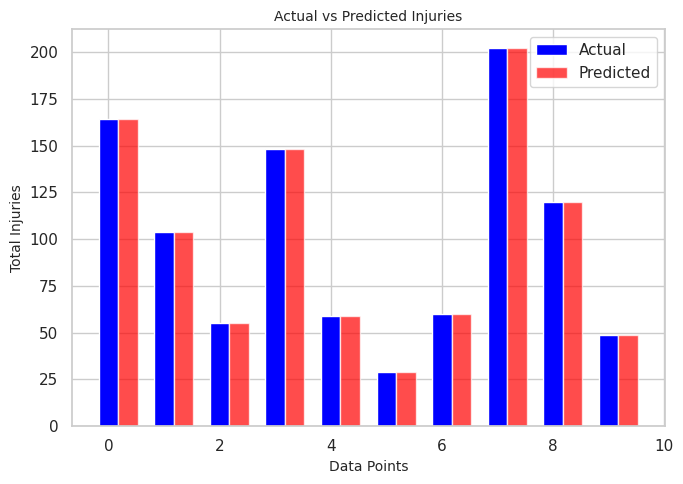

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_analytics/results/table/Konya_j_total_acc.csv')

# Prepare the features (X) and target variables (y)
X = data[['Death_and_injury_accidents', 'Property_damage_accidents', 'Death', 'Injured']]  # Features

# Separate target variables for accidents, deaths, and injuries
y_accidents = data['Total_Accidents']
y_deaths = data['Death']
y_injuries = data['Injured']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train_accidents, y_test_accidents = train_test_split(X, y_accidents, test_size=0.2, random_state=42)
_, _, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)
_, _, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)

# Initialize LinearRegression models for each target variable
model_accidents = LinearRegression()
model_deaths = LinearRegression()
model_injuries = LinearRegression()

# Train the models
model_accidents.fit(X_train, y_train_accidents)
model_deaths.fit(X_train, y_train_deaths)
model_injuries.fit(X_train, y_train_injuries)

# Make predictions for each model on the test set
y_pred_accidents = model_accidents.predict(X_test)
y_pred_deaths = model_deaths.predict(X_test)
y_pred_injuries = model_injuries.predict(X_test)

# Evaluate the models' performance
mae_accidents = mean_absolute_error(y_test_accidents, y_pred_accidents)
mse_accidents = mean_squared_error(y_test_accidents, y_pred_accidents)
r2_accidents = r2_score(y_test_accidents, y_pred_accidents)

mae_deaths = mean_absolute_error(y_test_deaths, y_pred_deaths)
mse_deaths = mean_squared_error(y_test_deaths, y_pred_deaths)
r2_deaths = r2_score(y_test_deaths, y_pred_deaths)

mae_injuries = mean_absolute_error(y_test_injuries, y_pred_injuries)
mse_injuries = mean_squared_error(y_test_injuries, y_pred_injuries)
r2_injuries = r2_score(y_test_injuries, y_pred_injuries)

# Print the evaluation metrics for each model
print("Accidents Model:")
print(f'MAE: {mae_accidents}, MSE: {mse_accidents}, R²: {r2_accidents}')

print("\nDeaths Model:")
print(f'MAE: {mae_deaths}, MSE: {mse_deaths}, R²: {r2_deaths}')

print("\nInjuries Model:")
print(f'MAE: {mae_injuries}, MSE: {mse_injuries}, R²: {r2_injuries}')

# Predictions for a specific test set (Optional)
print("\nPredictions for a specific test set (Accidents):")
print(y_pred_accidents[:10])  # Show first 10 predictions for accidents

print("\nPredictions for a specific test set (Deaths):")
print(y_pred_deaths[:10])  # Show first 10 predictions for deaths

print("\nPredictions for a specific test set (Injuries):")
print(y_pred_injuries[:10])  # Show first 10 predictions for injuries

# Plotting the predicted vs actual values for each model using line charts

# Line chart for Total Accidents
plt.figure(figsize=(7, 5))
plt.plot(y_test_accidents.values, label='Actual Accidents', color='blue')
plt.plot(y_pred_accidents, label='Predicted Accidents', color='red', linestyle='--')
plt.title('Actual vs Predicted Accidents', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Accidents', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line chart for Total Deaths
plt.figure(figsize=(7, 5))
plt.plot(y_test_deaths.values, label='Actual Deaths', color='blue')
plt.plot(y_pred_deaths, label='Predicted Deaths', color='red', linestyle='--')
plt.title('Actual vs Predicted Deaths', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Deaths', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line chart for Total Injuries
plt.figure(figsize=(7, 5))
plt.plot(y_test_injuries.values, label='Actual Injuries', color='blue')
plt.plot(y_pred_injuries, label='Predicted Injuries', color='red', linestyle='--')
plt.title('Actual vs Predicted Injuries', fontsize=10)
plt.xlabel('Data Points', fontsize=10)
plt.ylabel('Total Injuries', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Function for plotting bar charts
def plot_bar_chart(actual, predicted, title, ylabel):
    indices = np.arange(len(actual))
    bar_width = 0.35
    plt.figure(figsize=(7, 5))
    plt.bar(indices, actual, bar_width, label='Actual', color='blue')
    plt.bar(indices + bar_width, predicted, bar_width, label='Predicted', color='red', alpha=0.7)
    plt.title(title, fontsize=10)
    plt.xlabel('Data Points', fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.legend()
    #plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Bar chart for Total Accidents
plot_bar_chart(y_test_accidents.values, y_pred_accidents, 'Actual vs Predicted Accidents', 'Total Accidents')

# Bar chart for Total Deaths
plot_bar_chart(y_test_deaths.values, y_pred_deaths, 'Actual vs Predicted Deaths', 'Total Deaths')

# Bar chart for Total Injuries
plot_bar_chart(y_test_injuries.values, y_pred_injuries, 'Actual vs Predicted Injuries', 'Total Injuries')


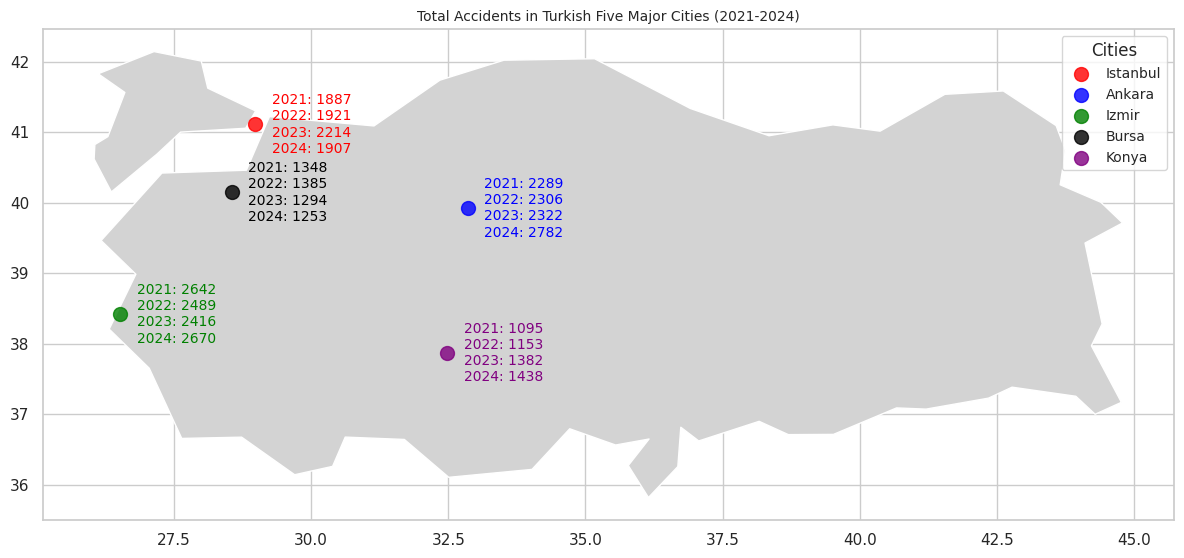

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data
data = {
    'City': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Konya'],
    'Latitude': [41.1082, 39.9208, 38.4192, 40.1443, 37.8716],
    'Longitude': [28.9784, 32.8541, 26.5187, 28.5550, 32.4847],
    '2021': [1887, 2289, 2642, 1348 , 1095],
    '2022': [1921, 2306, 2489, 1385, 1153],
    '2023': [2214, 2322, 2416, 1294, 1382],
    '2024': [1907, 2782 , 2670, 1253, 1438],
}

df = pd.DataFrame(data)

# Load Turkey shapefile (provide the path to the extracted shapefile)
turkey_map = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Data_analytics/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filter for Turkey
turkey_map = turkey_map[turkey_map['NAME'] == 'Turkey']

# Plot map
fig, ax = plt.subplots(figsize=(12, 12))
turkey_map.plot(ax=ax, color='lightgray')

# Define colors for cities
colors = ['red', 'blue', 'green', 'black', 'purple']

# Plot data for each city
for i, row in df.iterrows():
    # Scatter point for city
    ax.scatter(row['Longitude'], row['Latitude'], color=colors[i], s=100, label=row['City'], alpha=0.8)

    # Annotate accident data for each year
    annotation = (
        f"2021: {row['2021']}\n"
        f"2022: {row['2022']}\n"
        f"2023: {row['2023']}\n"
        f"2024: {row['2024']}"
    )
    ax.text(
        row['Longitude'] + 0.3, row['Latitude'], annotation,
        fontsize=10, color=colors[i], ha='left', va='center'
    )

# Title and legend
plt.title('Total Accidents in Turkish Five Major Cities (2021-2024)', fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=110)
plt.legend(title='Cities', loc='upper right', fontsize=10)
plt.grid(False, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import os

file_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
print(os.path.exists(file_path))


True


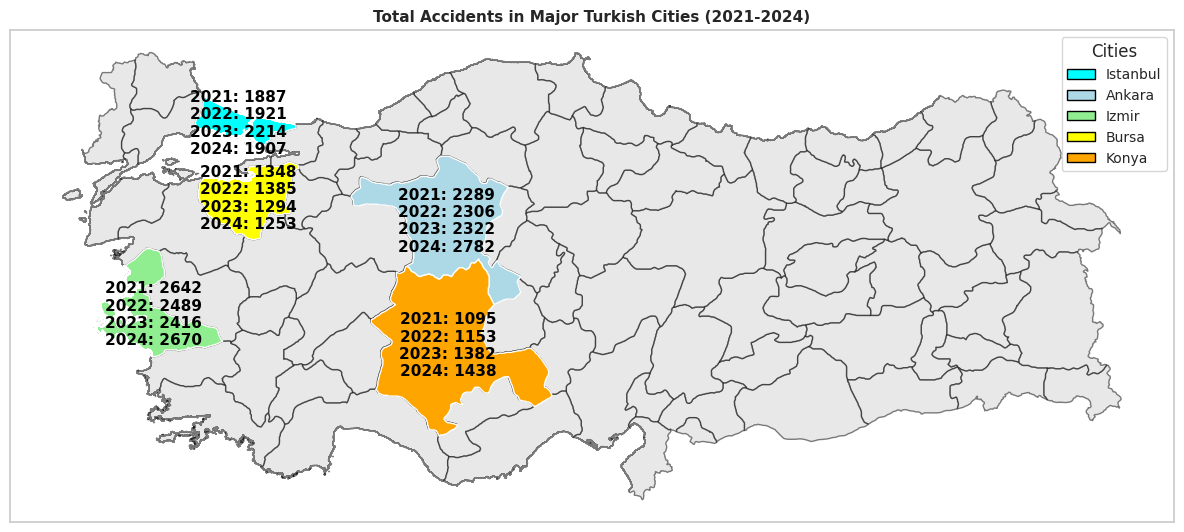

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load Turkey's provincial shapefile
shapefile_path = '/content/drive/My Drive/Colab Notebooks/Data_analytics/gadm41_TUR_shp/gadm41_TUR_1.shp'
turkey_map = gpd.read_file(shapefile_path)

# Define the cities of interest, their provinces, and accident data
cities_data = {
    'Istanbul': {'province': 'Istanbul', 'accidents': [1887, 1921, 2214, 1907]},
    'Ankara': {'province': 'Ankara', 'accidents': [2289, 2306, 2322, 2782]},
    'Izmir': {'province': 'Izmir', 'accidents': [2642, 2489, 2416, 2670]},
    'Bursa': {'province': 'Bursa', 'accidents': [1348, 1385, 1294, 1253]},
    'Konya': {'province': 'Konya', 'accidents': [1095, 1153, 1382, 1438]}
}
city_colors = {
    'Istanbul': 'cyan',
    'Ankara': 'lightblue',
    'Izmir': 'lightgreen',
    'Bursa': 'yellow',
    'Konya': 'orange'
}

# Project to a planar CRS
turkey_map = turkey_map.to_crs(epsg=3857)

# Filter the shapefile for the cities of interest
filtered_map = turkey_map[turkey_map['NAME_1'].isin([v['province'] for v in cities_data.values()])]

# Plot map
fig, ax = plt.subplots(figsize=(12, 12))
turkey_map.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# Plot each city's provincial boundary and add annotations for accidents
for city, data in cities_data.items():
    province_data = filtered_map[filtered_map['NAME_1'] == data['province']]
    province_data.plot(ax=ax, color=city_colors[city], label=f"{city} ({sum(data['accidents'])})")

    # Get the centroid of the province for annotation
    centroid = province_data.geometry.centroid
    for x, y in zip(centroid.x, centroid.y):
        annotation = (
            f"2021: {data['accidents'][0]}\n"
            f"2022: {data['accidents'][1]}\n"
            f"2023: {data['accidents'][2]}\n"
            f"2024: {data['accidents'][3]}"
        )
        ax.text(
            x, y, annotation, fontsize=11, fontweight='bold', color='black', ha='center', va='center'
        )

# Create a custom legend for city colors
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=city) for city, color in city_colors.items()
]
plt.legend(
    handles=legend_elements,
    title='Cities',
    loc='upper right',
    fontsize=10,
    title_fontsize=12
)

# Add title
plt.title('Total Accidents in Major Turkish Cities (2021-2024)',fontweight='bold', fontsize=11)

# Remove axis values and grid
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

plt.tight_layout()
plt.show()


<ipython-input-48-0f05250c74d3>:62: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Cities', loc='upper right', fontsize=10)
<ipython-input-48-0f05250c74d3>:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cities', loc='upper right', fontsize=10)


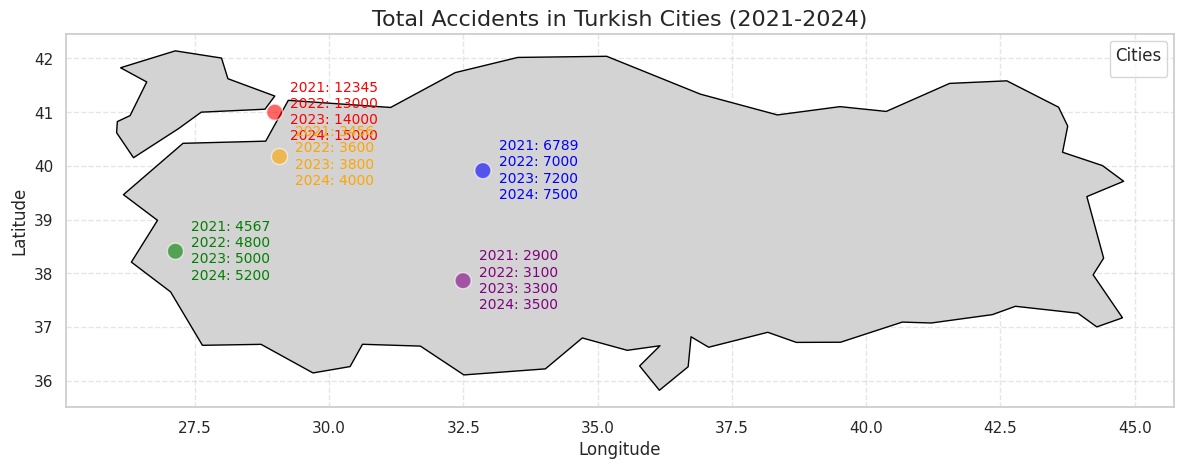

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data
data = {
    'City': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Konya'],
    'Latitude': [41.0082, 39.9208, 38.4192, 40.1828, 37.8716],
    'Longitude': [28.9784, 32.8541, 27.1287, 29.0663, 32.4847],
    '2021': [12345, 6789, 4567, 3456, 2900],
    '2022': [13000, 7000, 4800, 3600, 3100],
    '2023': [14000, 7200, 5000, 3800, 3300],
    '2024': [15000, 7500, 5200, 4000, 3500],
}

df = pd.DataFrame(data)

# Load Turkey shapefile
turkey_map = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Data_analytics/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filter for Turkey
turkey_map = turkey_map[turkey_map['NAME'] == 'Turkey']

# Convert the city data to a GeoDataFrame
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Adjust Bursa and Istanbul positions slightly to avoid overlap
geo_df.loc[geo_df['City'] == 'Istanbul', 'Longitude'] += 0.2
geo_df.loc[geo_df['City'] == 'Bursa', 'Longitude'] -= 0.2

# Create buffers around city points for border visualization
geo_df['geometry'] = geo_df['geometry'].buffer(0.15)

# Plot map
fig, ax = plt.subplots(figsize=(12, 12))
turkey_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Define colors for cities
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot city borders with color
for i, row in geo_df.iterrows():
    geo_df[geo_df['City'] == row['City']].plot(ax=ax, color=colors[i], alpha=0.6, label=row['City'])

    # Annotate accident data
    annotation = (
        f"2021: {row['2021']}\n"
        f"2022: {row['2022']}\n"
        f"2023: {row['2023']}\n"
        f"2024: {row['2024']}"
    )
    ax.text(
        row['geometry'].centroid.x + 0.3, row['geometry'].centroid.y,
        annotation, fontsize=10, color=colors[i], ha='left', va='center'
    )

# Title and legend
plt.title('Total Accidents in Turkish Cities (2021-2024)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cities', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
